<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Install

In [ ]:
! pip install min-dalle
! nvidia-smi

### Load Model

In [1]:
from PIL import Image
from IPython.display import update_display
import numpy
from min_dalle import MinDalle

model = MinDalle(is_mega=True, is_reusable=True)

initializing MinDalle
intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer


### Generate Images
Note: reduce the grid size if you run out of GPU memory.  4x4 has been tested to work on T4 and P100 (with intermediate_image_count = None)

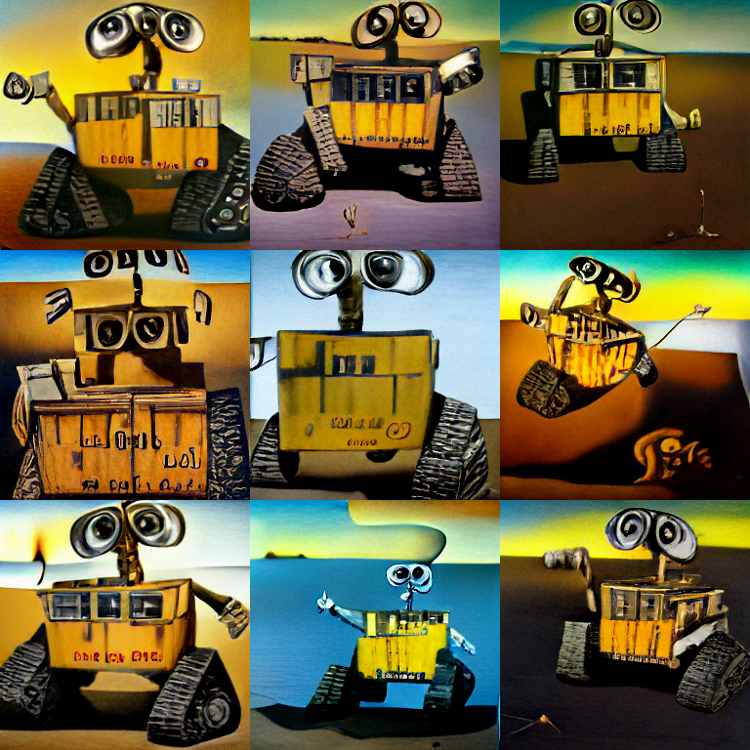

CPU times: user 34.4 s, sys: 897 ms, total: 35.3 s
Wall time: 36.5 s


In [2]:
%%time

text = "Dali painting of WALL·E" #@param {type:"string"}
grid_size = 3 #@param {type:"integer"}
seed = -1 #@param {type:"integer"}
intermediate_image_count = 8 #@param ["2", "4", "8", "16", "None"] {type:"raw"}

display_size = 750
image_shape = (display_size, display_size, 3)
zero_image = Image.fromarray(numpy.zeros(image_shape, dtype=numpy.uint8))
display(zero_image, display_id=1)

def handle_intermediate_image(row_index: int, image: Image.Image):
    image = image.resize((display_size, display_size))
    update_display(image, display_id=1)

image = model.generate_image(
    text,
    seed,
    grid_size,
    intermediate_image_count,
    handle_intermediate_image
)